In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X0 = [3, 2]
Valor da funcao no Ponto Inicial: 35.4325

Ponto Minimo encontrado: [-33.0, -21.999999999999996]
Valor da funcao no Ponto Minimo encontrado: 8723.4325

Resultado obtido em: 10 iteracoes.


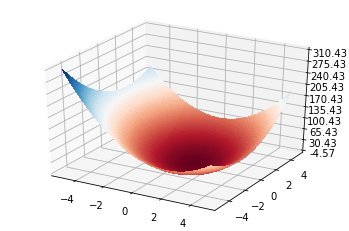

In [198]:
def funcao(x1,x2):
    s = 5 * x1**2 -2*((5*x1)+x2) + 2*x1*x2 +3*x2**2 + 173./400
    return s

def derivs(x1,x2):
    dsdx1 = 10*x1 + 2*x2 -10
    dsdx2 = -2 + 2*x1 + 6*x2
    return dsdx1,dsdx2

def mod(x1,x2):
    m = (((derivs(x1,x2)[0])**2.)+((derivs(x1,x2)[1])**2.))**(1/2.)
    return m
    
def otimizacao(e=1e-6):
    x1 = np.random.randint(-5,5)
    x2 = np.random.randint(-5,5)
    xk = [x1,x2]
    result = funcao(xk[0],xk[1])
    print('X0 = ' + str(xk))
    print('Valor da funcao no Ponto Inicial: ' + str(result))
    print()
    
    k = 0
    n = 10
    
    for i in range(n):

            ck = [derivs(x1,x2)[0],derivs(x1,x2)[1]]
            grad_s = np.array(ck)
            dk = -grad_s
            modulo = mod(xk[0],xk[1])
            alfa = 0.15
            
            if modulo < e:
                break
            else:

                grad_smenos1 = np.array(ck)
                dkmenos1 = dk

                xk[0] = xk[0] + dk[0]*alfa
                xk[1] = xk[1] + dk[1]*alfa

                ck = [derivs(xk[0],xk[1])[0],derivs(xk[0],xk[1])[1]]
                grad_s = np.array(ck)
                dk = -grad_s + dkmenos1 * (np.transpose(grad_s)*grad_s)/(np.transpose(grad_smenos1)*grad_smenos1)             

                k = k + 1
            
    result = funcao(xk[0],xk[1])
    print('Ponto Minimo encontrado: ' + str(xk))
    print('Valor da funcao no Ponto Minimo encontrado: ' + str(result))
    print()
    print('Resultado obtido em: ' + str(k) + ' iteracoes.')

    def funcao_plot(x1,x2):
        return (5 * x1**2 -2*((5*x1)+x2) + 2*x1*x2 +3*x2**2 + 173./400)

    x1 = arange(-5.0,5.0,0.1)
    x2 = arange(-5.0,5.0,0.1)
    X,Y = meshgrid(x1, x2) 
    Z = funcao_plot(X, Y) 
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=0, antialiased=False)
    
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    #abaixo linha de codigo que marcaria o ponto minimo calculado anteriormente no grafico exibido 
    #plt.plot(xk[0], xk[1], funcao(xk[0],xk[1]), color='green', marker='X')

    plt.show()
    
otimizacao()